<a href="https://colab.research.google.com/github/adeeconometrics/literate-programming/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability & Simulations
By Dave Amiana

In this notebook, we will explore  some interesting concepts introduced in Probability theory, together with simple simulations to interact with these concepts.

----
## Introduction
We begin our discussion by introducing some elementary concepts in Probability. It is important to note that the language of probability theory can be expressed using the language of Sets in [Set theory](https://brilliant.org/wiki/set-theory/#:~:text=Set%20theory%20is%20a%20branch,%5C%7D%20%7B%E2%99%A1%2C%E2%99%A0%7D.). 
Here we list some basic terminologies to further our discussion. 

- Experiments - the process of observing a phenomemon that has variations in its outcomes
- Outcome - a result from a single trial of an experiment
- Sample Space - the set of all possible outcomes of an experiment, we denote this, by convention, as $S$.
    - Event - a collection of some outcome from an experiment; a subset of the sample space
        - simple event - an event that contains one element.
        - compound event - a set that can be espressed as a *union* of simple events. 
    - Null space (or empty space) - a subset of the sample space that contains no elements, we denote this by $\emptyset$.

At this point, we shall introduce some basic operations we can do with these concepts. Later, we shall see a prototypical implementation of these operations in Python. 
- Union ($A \cup B$): Contains both elements $A$ and $B$.
    - E.g. Let $A:=\{1,2,3\}$ and $B:=\{3,4,5\}$, then $A\cup B=\{1,2,3,4,5\}$

- Intersection ($A\cap B$): Contains elements that are common to set $A$ and $B$.
    - E.g. Let $A:=\{1,2,3\}$ and $B:=\{3,4,5\}$, then $A\cap B=\{3\}$

- Complementation ($A^C$): Contains elements not in $A$.
    - E.g. Let $S:=\{ s\in \mathbb{N}| 1\leq s \leq 10\}$, and $A:=\{1,2,3,4,5\}$, then $A^C=\{6,7,8,9,10\}$
    
We can think of these operations as set-constructors which lists down a new set of elements. **But how do we represent sets in computers? **

----
## Constructing Sets: A conceptual overview 

The representation of a set on a computer requires a change from the set-theoretic conception where the order is deemed irrelevant. In the case of computers, we have to assume definite order in the underlying universal set; that is to say that a set is always defined in a computer program with respect to an underlying universal type (set) and the elements in the the universal set are listed in an ordered manner. 

For an instance, let $M=\{x \in \mathbb{N}|0< x \leq 10\}$ be the universal set, then the representation of $\bar{M}:=\{n \in M| n\; mod \; 2=0\}$ is given by a memory representation in bits of 10 strings as $0101010101$. Where $0,1$ are boolean representation of memberships in the set. 

There is a one-to-one correspondence between the subsets of $M$ and all possible n-bit strings. Further, the set theoretical operations of set  can be carried out directly with the bit strings (provided that the sets involved are defined with respect to the same universal set). 

This representation stems not only from an engineering perspective of computer memory, but to a more abstract piece of mathematics that made computer science its name as becoming a highly theoretical subject called Type theory.
However, we will not talk about Types and its more rigorous properties over sets. For now, it is interesting to note that we can, indeed, construct sets from primitive data types. And in that way, our membership assumptions will not be taken for granted. For the interested reader, I recommend to read the Philosophical entries of this theory first which I link [here](https://bityl.co/4Ce2).

<!-- describe the algorithm to construct sets with list comprehensions -->

In [ ]:
# set a list and do the above operations 
# search how to implement sets in Python

## Conceptions of Probability
The study of Probability can be an unsettling course, especially if you were used to deductive reasoning like classical logic, or geometry. But probability rewards us to deal with uncertain events and formally reason about them. Probability has been involved with lots of controversies on the matter regarding its principles and schools of thoughts. The formalisation of the field was achieved by three primary axioms called the [Kolmogorov Axioms](https://bityl.co/45fQ). 

This notebook will not introduce the axiomatic version of probability theory, instead it shall provide us an intuitive understanding, as well as familiarity with the concepts tailored in probability theory. To get back with the axiomatic foundations, it is sufficient, given the purpose of this notebook, to think about the Kolmogorov axioms as the concepts that glues probability as a formal piece of mathematics were one can use logic to deal with uncertain events.  

For this section, I shall introduce you to some assertions on probabilities. First, what do we mean by probability? **Probability pertains to the likelihood of occurrence of an even** We can assert probability in three ways:
1. Subjective Probability - which takes a wild guess about the chances of an occurrence e.g. beliefs, opinion, educated guess, intuition, etc. 
2. Classical Probability -  are applied when all possible outcomes are *equally likely to happen*
3. Empirical Probability -  are assigned based on the prior knowledge of events i.e. based from research experiments

Each of these has distinct features which I discussed further in this [blog post](https://bityl.co/45fx). 

----
## Counting Principles, Permutations, and Combinations

### Counting: Multiplication Rule
 If an operation (or relationships) can be perfomed (or combined) in $n_1$ ways, and for each of these, a second operation can be performed in $n_2$ ways, then the result of combining the two operations is: $n_1 \times n_2$. 

 Note: The generalization of this rule is achieved by adding subsequent operations $n_1, ..., n_k$ which translates to $n_1 \times, ..., \times n_k$ operations. 

<!--
FROM MULTIPLICATION TO FACTORIALS, WHY IT MAKES SENSE? GIVE MORE EXAMPLES. 
--> 

 ### Permutation and Combinations
 It is important to realize that permutation concerns about arrangements of sets (with order) while combinations does not regard order. These concepts should be distinguished first for it can be confusing from the everyday use of the term *combination* what we really mean is *permutation*. For instance, the combination of our password, taken from the meaning we ought to ascribe in this context, can imply that the orders $1,2,3 \equiv 3,2,1 \equiv 2,1,3 ...$ 
 
 In other words, the correct combination of numbers regardless of their order shall be deemed as valid. But that is certainly not how we should encrypt passwords.

---- 

#### Defintions and Overview 
  As we mentioned above, **permutation** pertains to an ordered arrangement of all part of a set of objects.  Permutation may also be defined as an arrangement of its members into a sequence or [linear order](https://bityl.co/4Dsd), or if the set is already ordered, a rearrangement of its elements. The term  "permutation" also refers to the act or process of changing the linear order of an ordered set.


Consider the set $A := \{a_1, a_1, ..., a_n \}$. A permutation $\pi$ of $A$ is an ordering $a_{\pi 1}, a_{\pi 2} ,..., a_{\pi n}$ of the elements of $A$. Note that $i \neq j \to \pi_i \neq \pi_j$. For example, the permutations of set $B:=\{a,b,c,d\}$ are as follows:

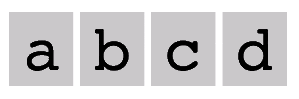

<!-- insert gif to demonstrate shuffling -->


Note that all of the objects must appear in a permutation and two orderings are considered different if some object appears in a different place in the orderings.

Generally, there are $n!$ permutations of an n-element set. Where $n!$ is defined as the factorial of $n$ or $n_1 \cdot (n-1) \cdot \cdot \cdot 2 \cdot 1 = \prod_{i-1}^{n}i$.


<!-- this is what we meant by i ≠j → πᵢ ≠ πⱼ-->

**Definition: Permutation** *A permutation of a set of (distinct) objects is an ordering of the objects in row*

#### Expressing $n!$ in code:
````
recursive_function(n):
    if (n==0): return 1
    return n*function(n-1)
````
<!--brief explanation of the code, why use recursion? -->
----
#### Cases of Permutations 

- Permutations of a Set of Distinct Objects: a case where all objects need to be arranged 
- Permutations of a Subset of Distinct Objects
- Permutations with Repetition
- Permutations with Restriction


#### Illustrative Examples 
  We shall describe some cases where different versions of the permutations formula are applied for a given example. 
  - How many distinct permutations can be made from the letters of the word "Mathematics".
  - How many ways can a caravan of 10 covered wagons from U.S. be arranged in a cricle?
  - A college plays 10 football games during a season. In how many ways can the team end the season with 5 wins, 2 loses and 3 ties?

For more examples visit this link [Brilliant.org](https://brilliant.org/wiki/permutations/)

-----

In [ ]:
# factorial for small numbers: a conceptual demo
def factorial(n):
    if(n==0): return 1
    return n*factorial(n-1)
# <test> factorial(10)

# alternatively we can use the built-in python library called math
import math 
# <test> n =10
math.factorial(n)


#### Interesting case: What happens when $n$ gets super large?

In this case, we use an approximation instead of recursive functions to make our computation more efficient. In that sense, we use the [Stirling's formula](https://en.wikipedia.org/wiki/Stirling%27s_approximation) which states that $n!$ is approximated by:

$${\displaystyle n!\sim {\sqrt {2\pi n}}\left({\frac {n}{e}}\right)^{n},}$$

In [ ]:
# let's express Stirling's formula in Python

# import math
def Stirling(n):
    return math.sqrt(2* math.pi *n)* math.pow((n/math.e), n)


Interesting case: How can we compute for $\pi !$?

The gamma function:
<!-- give trivial illustration and cite some interesting properties of the Gamma function-->
 
$$\Gamma: [0, \infty) \mapsto \mathbb{R}$$
$$\int_{- \infty}^{\infty} t^{x-1}e^{-t} dt \;| x\in \mathbb{N}$$

In [ ]:
import math 
from functools import reduce

def permutation(n,r):
    return int(f(n)/(f(n-r)))

def combination(n,r):
    return int(f(n)(f(n-r)*f(r)))
# c=lambda x,y: f(x)/(f(x-y)*f(y))

def circle(n):
    return int(f(n-1))

def permutation_cetegories(n,r):
    bottom = reduce((lambda x,y: f(x)*f(y)), r)
    return int(f(n)/bottom)


Problem
* Suppose a set $A$ has 37 elements. How many subsets of $A$ have 10 elements? How many subsets have 30 elements? How many have 0 elements?
*   A set $X$ has exactly 56 subsets with 3 elements. What si the cardinality of $X$?
*   Suppose a set $B$ has the property that $|\{X:X\in \mathcal{P}(B), |X|=6 \}|=28$.  Find $|B|$. 
* $|\{X\in \mathcal{P}(\{x\in \mathbb{N}: 0\leq x \leq 9\}): |X|=4\}|$ = ?
* $|\{X\in \mathcal{P}(\{x\in \mathbb{N}: 0\leq x \leq 9\}): |X|<4\}|$ = ?


In [ ]:
# finding a satisfiable solution for P(n, num) = result where number and result have some concrete value
import math as m
f = m.factorial 

def find_perm(num, k, n=1):
    if(n<k):
        n=k+1
    while n>0: 
        if((f(n)/(f(n-k)*f(k))==num))
            return n
        n=n+1


## Classical Probability 
Before we further this discussion, it is important to note that the main assumption make for modelling events in classical probability are that which follows an equal distribution. That means for every element in the sample space, we get an equal amoun of probabilities per element. 

$$P(A_1)=P(A_2)$$
where $A_1, A_2 \in S$.

----
### Properties of Classical Probaiblities:
- $0 \leq P(E) \leq 1, P(\emptyset) =0, P(S)=1$
- If $S:=\{x_1,...,x_k\}$, then $P(\{x_1 \})=\frac{1}{k}$ and $\sum_{i=1}^{k} P(\{x_i\})=1$


## Plans on this notebook:
- illustrate counting principle 
- illustrate conditional, independent, and joint probabilities via examples 
- some worked exercises with experimental data 